In [24]:
# storing the data set in a dataframe df

import pandas as pd
df = pd.read_csv('DiseaseX_Detection_Dataset.csv')


# storing the test data set in a dataframe test_df
test_df = pd.read_csv('DiseaseX_Detection_Test.csv')


In [25]:
#descriptive statistics for df

df.describe()



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X82,X83,X84,X85,X86,X87,X88,X89,X90,Response
count,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,...,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000
mean,43.232634,1.764593,9.144160,1.079497,-7.111106,-9.329027,-2.592898,-1.787686,3.861653,1.854970,...,-74.164584,41.185207,38.199061,0.241528,18.247345,-26.081973,4.515906,18.161538,1.625678,0.453413
std,6.091697,51.864097,35.133630,16.265762,23.061156,12.925541,14.545150,7.939242,10.629991,6.452456,...,175.127542,121.264378,93.537653,15.917842,111.846583,170.878606,13.153380,182.579917,21.879678,0.497827
min,4.418500,-337.092500,-257.525600,-121.600710,-181.953370,-70.693420,-188.214000,-62.412130,-126.479040,-36.620600,...,-2984.920970,-1733.722110,-1495.872230,-198.622200,-2343.894110,-3026.006600,-233.456480,-5000.654060,-230.848180,0.000000
25%,39.775735,-26.028810,-10.924085,-8.568195,-21.359655,-18.272825,-11.004705,-6.450315,-2.238460,-2.439950,...,-138.103025,-21.192715,-4.660905,-6.792235,-30.569565,-101.991320,-2.466970,-60.479085,-8.649055,0.000000
50%,44.056990,8.912540,10.993630,-0.630970,-6.448840,-10.955990,-2.193550,-1.741420,3.915670,1.785540,...,-53.429970,28.329560,33.281290,0.693870,15.776870,-21.511010,3.178860,6.524800,0.239720,0.000000
75%,47.726565,36.862500,30.268100,8.714885,7.419680,-2.186380,6.306850,2.917790,10.113345,6.121435,...,11.972775,88.858570,77.237765,8.181660,67.692765,51.671800,9.980265,84.338660,9.945960,1.000000
max,58.196280,384.065730,268.376010,157.364670,191.615990,119.815590,121.211920,82.942190,146.297950,60.345350,...,2087.990290,2775.334960,1468.295490,198.180750,1348.848890,2635.742650,229.888800,5289.111380,378.662140,1.000000


In [26]:
# printing how many columns, rows, and values are in df and test_df

print(f"Number of columns (df): {len(df.columns)}")
print(f"Number of rows (df): {len(df)}")
print(f"Number of values (df): {df.size}")
print("\n")
print(f"Number of columns (test_df): {len(test_df.columns)}")
print(f"Number of rows (test_df): {len(test_df)}")
print(f"Number of values(test_df): {test_df.size}")


Number of columns (df): 91
Number of rows (df): 109999
Number of values (df): 10009909


Number of columns (test_df): 90
Number of rows (test_df): 12000
Number of values(test_df): 1080000


In [27]:
# In the following code we will check for missing values in df and test_df

# Checking for missing values in the entire train DataFrame
missing_values = df.isnull().sum()


# Displaying the total count of missing values in the train DataFrame
total_missing = missing_values.sum()
print(f"Total Missing Values in df: {total_missing}")


print("\n")
# Checking for missing values in the entire test DataFrame
missing_values_test = test_df.isnull().sum()


# Displaying the total count of missing values in the DataFrame
total_missing_test = missing_values_test.sum()
print(f"Total Missing Values in test_df: {total_missing_test}")

Total Missing Values in df: 0


Total Missing Values in test_df: 0


No missing values in the dataset.

In [28]:
# calculating the percentage of value=1 for Response column in df
#percentage of instances that contain the disease

response_ones = df['Response'].value_counts()[1]
response_zeros = df['Response'].value_counts()[0]
total_rows = len(df)
percentage = (response_ones / total_rows) * 100
print(f"Percentage of value=1 for Response column: {percentage:.2f}%")
percentage2 = (response_zeros / total_rows) * 100
print(f"Percentage of value=0 for Response column: {percentage2:.2f}%")




Percentage of value=1 for Response column: 45.34%
Percentage of value=0 for Response column: 54.66%


In [29]:
#Calculating F-statistic (and p-values) of the columns to estimate the significance of the predictor variables

import statsmodels.api as sm

# Get all column names except for the response variable
predictor_cols = df.columns[:-1]

# Fit the linear regression model
model = sm.OLS(df['Response'], sm.add_constant(df[predictor_cols])).fit()

# Print the ANOVA table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Response   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     351.9
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:43:26   Log-Likelihood:                -65429.
No. Observations:              109999   AIC:                         1.310e+05
Df Residuals:                  109908   BIC:                         1.319e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6540      0.019    142.091      0.0

Result:

With F-statistic being 351.9 and Prob (F-statistic) being less than 0.00, we can say that the predictor variables indeed correlate with the response variable.

Next step would be to determine which variables are insignificant - for this we have to consider the p-values for each predictor variable individually. I'm setting the p-value significance level at 0.05

Due to a large number of predictor variables we will be using Backward Selection to eliminate the insignifant variables (starting with all variables).

In [30]:
#printing insignificant variables - variables with the p-value of greater that 0.05

# Get the p-values of the predictor variables
pvalues = model.pvalues.drop('const')

# Select the predictor variables that are insignificant (p-value > 0.05)
insignificant_vars = pvalues[pvalues > 0.05].index.tolist()

# Print the results for the insignificant predictor variables
for var in insignificant_vars:
    print(f"Variable: {var}, p-value: {pvalues[var]}")

Variable: X7, p-value: 0.10500663666435395
Variable: X17, p-value: 0.4093650456900352
Variable: X22, p-value: 0.10231877684341396
Variable: X32, p-value: 0.2554932666218722
Variable: X35, p-value: 0.5796011919302142
Variable: X45, p-value: 0.4358958512383385
Variable: X47, p-value: 0.3586722687857231
Variable: X49, p-value: 0.6156862516327272
Variable: X50, p-value: 0.23652710243182598
Variable: X52, p-value: 0.10023546034124063
Variable: X54, p-value: 0.5123495973628216
Variable: X56, p-value: 0.15707655336299922
Variable: X66, p-value: 0.14552036761544293
Variable: X67, p-value: 0.0573314223086573
Variable: X68, p-value: 0.3645172674974769
Variable: X70, p-value: 0.2066961434428243
Variable: X72, p-value: 0.9713354275368818
Variable: X73, p-value: 0.8294164250418715
Variable: X77, p-value: 0.7490107658240535
Variable: X79, p-value: 0.1341920369562617
Variable: X81, p-value: 0.9127847133923948
Variable: X86, p-value: 0.6062035003777413


We can see that there are 22 predictor variables that can be considered insignificant due to their p-value. Now we can create a new data frame that removes those predictor variables.

In [31]:
# remove the insignificant variables and store the new data frame as df2

# Create a list of columns to drop
columns_to_drop = insignificant_vars

# Drop the insignificant columns from the dataframe
df2 = df.drop(columns=columns_to_drop)
test_df=test_df.drop(columns=columns_to_drop)



Now that we removed those variables, we need to print the ANOVA table for the new data - df2


In [32]:
#Calculating F-statistic (and p-values) of the columns to estimate the significance of the predictor variables for df2

# Get all column names except for the response variable
predictor_cols = df2.columns[:-1]

# Fit the linear regression model
model = sm.OLS(df2['Response'], sm.add_constant(df2[predictor_cols])).fit()

# Print the ANOVA table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Response   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     465.4
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:43:27   Log-Likelihood:                -65441.
No. Observations:              109999   AIC:                         1.310e+05
Df Residuals:                  109930   BIC:                         1.317e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6531      0.018    145.354      0.0

We can see that the F-Statistic increased. Let's check if we have insignificant variables


In [33]:
#printing insignificant variables - variables with the p-value of greater that 0.05

# Get the p-values of the predictor variables
pvalues = model.pvalues.drop('const')

# Select the predictor variables that are insignificant (p-value > 0.05)
insignificant_vars = pvalues[pvalues > 0.05].index.tolist()

# Print the results for the insignificant predictor variables
for var in insignificant_vars:
    print(f"Variable: {var}, p-value: {pvalues[var]}")

Variable: X90, p-value: 0.053531847500483044


Now there's only 1 variable with the p-value of over 0.05 We can remove it from the df2.


In [34]:
# remove the insignificant variables and store the new data frame as df3

# Create a list of columns to drop
columns_to_drop = insignificant_vars

# Drop the insignificant columns from the dataframe
df3 = df2.drop(columns=columns_to_drop)
test_df=test_df.drop(columns=columns_to_drop)



Repeating the steps again to determine whether we need to drop any more variables.

In [35]:
#Calculating F-statistic (and p-values) of the columns to estimate the significance of the predictor variables for df3

# Get all column names except for the response variable
predictor_cols = df3.columns[:-1]

# Fit the linear regression model
model = sm.OLS(df3['Response'], sm.add_constant(df3[predictor_cols])).fit()

# Print the ANOVA table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Response   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     472.3
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:43:28   Log-Likelihood:                -65443.
No. Observations:              109999   AIC:                         1.310e+05
Df Residuals:                  109931   BIC:                         1.317e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6535      0.018    145.381      0.0

In [36]:
#printing insignificant variables - variables with the p-value of greater that 0.05

# Get the p-values of the predictor variables
pvalues = model.pvalues.drop('const')

# Select the predictor variables that are insignificant (p-value > 0.05)
insignificant_vars = pvalues[pvalues > 0.05].index.tolist()

# Print the results for the insignificant predictor variables
for var in insignificant_vars:
    print(f"Variable: {var}, p-value: {pvalues[var]}")

Variable: X82, p-value: 0.05253983861831669


There is 1 variable that can be considered insignificant - we can remove it from the data frame

In [37]:
# remove the insignificant variables and store the new data frame as df4

# Create a list of columns to drop
columns_to_drop = insignificant_vars

# Drop the insignificant columns from the dataframe
df4= df3.drop(columns=columns_to_drop)
test_df=test_df.drop(columns=columns_to_drop)



In [38]:
#printing insignificant variables - variables with the p-value of greater that 0.05

# Get the p-values of the predictor variables
pvalues = model.pvalues.drop('const')

# Select the predictor variables that are insignificant (p-value > 0.05)
insignificant_vars = pvalues[pvalues > 0.05].index.tolist()

# Print the results for the insignificant predictor variables
for var in insignificant_vars:
    print(f"Variable: {var}, p-value: {pvalues[var]}")

Variable: X82, p-value: 0.05253983861831669


We can see that there are no variables left with the p-value of over 0.05. Let's check how many columns are left in df and test_df.

In [39]:
# prompt: write a code describing properties of df and df4 (number of columns etc)

# Print the number of columns in df and df4
print(f"Number of columns in df: {len(df.columns)}")
print(f"Number of columns in df4: {len(df4.columns)}")
print(f"Number of columns in test_df: {len(test_df.columns)}")




Number of columns in df: 91
Number of columns in df4: 67
Number of columns in test_df: 66


That means that through backward selection 24 variables were taken out. Response column is missing from test_df (because that's what we're trying to predict) that's why the count is -1 for test_df.

Next, let's check for outliers in the data. If the model relies too heavily on outliers, our prediction model will be too biased, has a risk of overfitting, and won't do well on test data. For this code we will calculate outliers for each column.

In [40]:
import pandas as pd
import numpy as np

# calculating outliers for 'df4'- for each column

# Calculate z-scores for each column
z_scores = np.abs((df4 - df4.mean()) / df4.std())

# Define a threshold for z-score to consider a data point as an outlier (A common z score for outliers is z_score_threshold = 3)
z_score_threshold = 3

# Identify outliers by checking if the z-score is greater than the threshold
outliers = (z_scores > z_score_threshold).any(axis=1)

# Display the number of outliers
num_outliers = outliers.sum()
print(f"Number of Outliers: {num_outliers}")


Number of Outliers: 27428


We can see that there are many outliers in our data. Let's remove them from df4.

In [41]:
# Remove outliers from the DataFrame and assign it to df5
df5 = df4[~outliers]

print(f"Number of columns: {len(df4.columns)}")
print(f"Number of rows: {len(df4)}")
print(f"Number of values: {df4.size}")

print(f"Number of columns: {len(df5.columns)}")
print(f"Number of rows: {len(df5)}")
print(f"Number of values: {df5.size}")

Number of columns: 67
Number of rows: 109999
Number of values: 7369933
Number of columns: 67
Number of rows: 82571
Number of values: 5532257


We can see that the number of rows diminished by 27428, we will test whether this improved the overall accuracy of the model later.

Now we will use visualizations to pre-analyze the data.

<ipython-input-42-a9748941189c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df5['Response'], data=df5, palette='viridis')


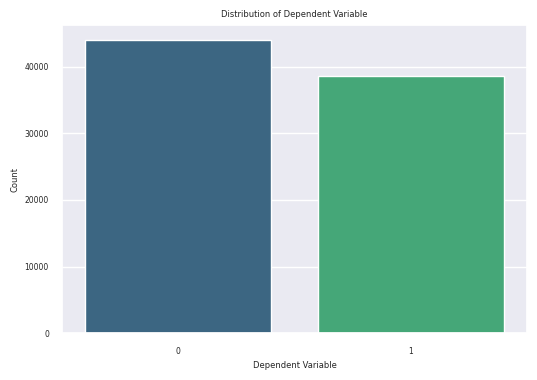

Percentage of value=1 for Response column: 46.73%


In [42]:
#creating a plot displaying the distribution of Response variable in df5

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Dependent variable ('Response') in df
plt.figure(figsize=(6, 4))
sns.countplot(x=df5['Response'], data=df5, palette='viridis')
plt.title('Distribution of Dependent Variable')
plt.xlabel('Dependent Variable')
plt.ylabel('Count')
plt.show()

# calculating the percentage of value=1 for Response column in df
#percentage of instances that contain the disease

response_ones = df5['Response'].value_counts()[1]
total_rows = len(df5)
percentage = (response_ones / total_rows) * 100
print(f"Percentage of value=1 for Response column: {percentage:.2f}%")


We can see that 0 is slightly more prevalent in the Response (per our calculations - Percentage of value=1 for Response column: 46.73%). but since we don't know the real distribution of DiseaseX, we will have to go off those values and train our data according to those values. However, in the real world, most values would be 0 as the real % of people who have DiseaseX is a lot smaller.

It changed very slightly from our earlier calculation - Percentage of value=1 for Response column: 45.34%.

This is relevant because we want to be close to 45-47% for percentage of the predicted yhat value=1. If the percentage is extremely off, that might indicate issues in the classification model.

Next we're going to take a look at correlations between variables and see if there is any multicollinearity present.

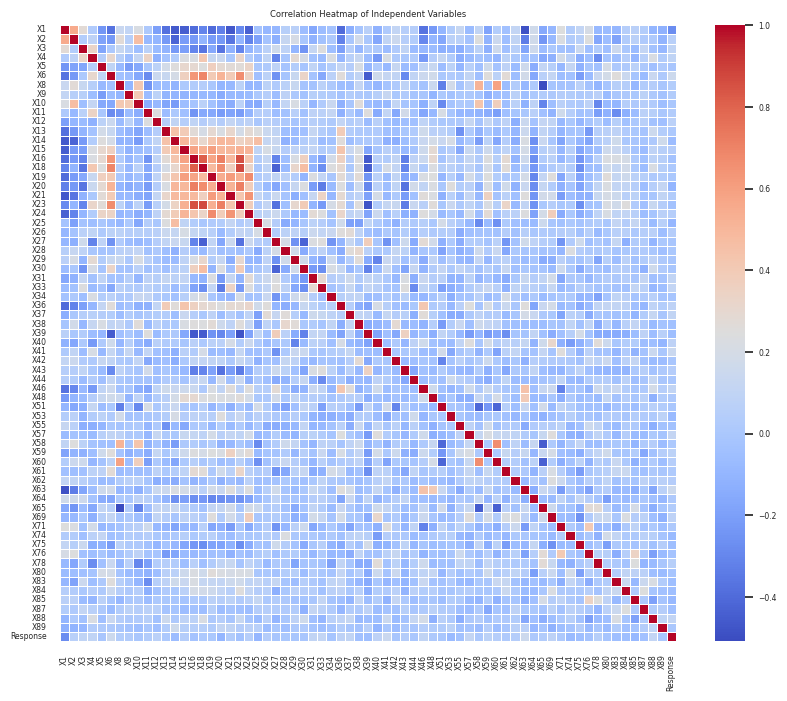

In [43]:
# calculating correlation matrix where 'df5' is the DataFrame and 'Response' is the dependent variable
correlation_matrix = df5.iloc[:, :67].corr()

# Setting a moderate figure size and a smaller font size
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.5)  # Adjusting the font_scale as needed

# Creating a heatmap with more space and without annotating values
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, square=True)

# Adding title
plt.title('Correlation Heatmap of Independent Variables')

# Showing the plot
plt.show()

Here's a brief overview of the color scale interpretation:

Dark Blue: Strong negative correlation

Light Blue: Weak negative correlation

White: Perfect positive correlation

Light Red: Weak positive correlation

Dark Red: Strong positive correlation

In a correlation heatmap, a white spot or square indicates a perfect correlation (correlation coefficient of 1) between the corresponding pair of variables. This means that the variables have a linear relationship, and the increase in one variable is perfectly associated with the increase in the other, and vice versa.

We can see that there are indeed variables that correlate with each other. Let's order the next correlation heatmap by correlation value


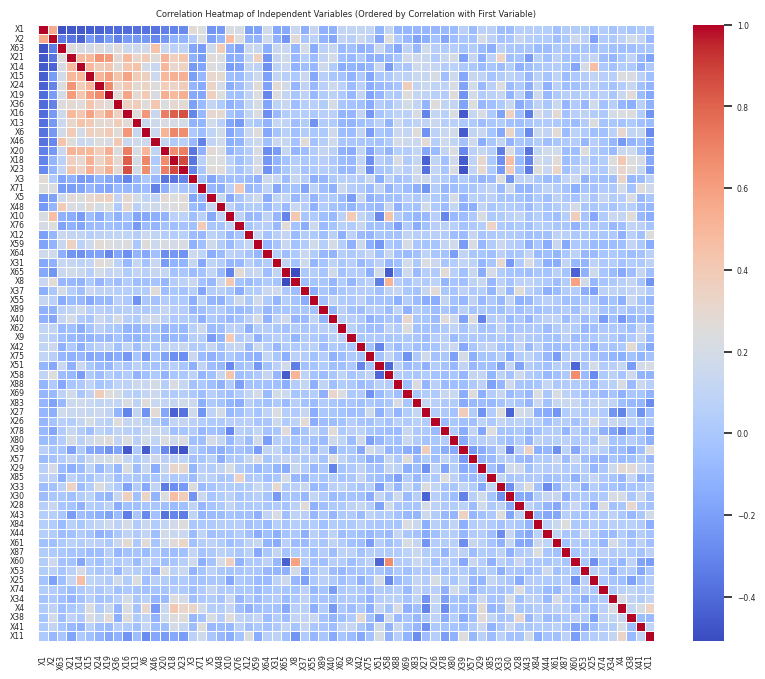

In [44]:
# correlation matrix for 'df5' is the DataFrame and 'Response' is the dependent variable
correlation_matrix = df5.iloc[:, :66].corr()

# Order variables by their correlation with the first variable
order = correlation_matrix.iloc[0].abs().sort_values(ascending=False).index
correlation_matrix_ordered = correlation_matrix.loc[order, order]

# Set a moderate figure size and a smaller font size
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.5)  # Adjust the font_scale as needed

# Create a heatmap with more space and without annotating values
sns.heatmap(correlation_matrix_ordered, annot=False, cmap='coolwarm', linewidths=0.5, square=True)

# Add title
plt.title('Correlation Heatmap of Independent Variables (Ordered by Correlation with First Variable)')

# Show the plot
plt.show()

We can see there's multicollinearity present in the data, let's analyze this further. To do so, we will be using VIF score. VIF stands for Variance Inflation Factor, and it is a measure used to quantify the extent of multicollinearity in a set of predictor variables within a regression model. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, leading to issues in estimating the individual coefficients' impact and making the interpretation of the model less reliable. For this code we will be using a VIF threshold of 10.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculating VIF values for df5 in order to analyze multicollinearity in the data
X_df5 = df5.drop('Response', axis=1)  # Features (independent variables)

# Set a threshold for VIF (5 - indicates multicollinearity, 10 - high collinearity)
vif_threshold = 10

vif_data_df5 = pd.DataFrame()
vif_data_df5["Variable"] = X_df5.columns
vif_data_df5["VIF"] = [variance_inflation_factor(X_df5.values, i) for i in range(X_df5.shape[1])]

# Display variables with VIF above the threshold
multicollinear_vars = vif_data_df5[vif_data_df5["VIF"] > vif_threshold]
print("Variables with high VIF (indicating multicollinearity):")
print(multicollinear_vars)

Variables with high VIF (indicating multicollinearity):
   Variable        VIF
0        X1  46.467955
12      X14  12.709399
13      X15  15.459743
14      X16  28.116811
15      X18  43.964277
16      X19  24.390970
17      X20  29.270529
18      X21  25.284505
19      X23  41.189877
20      X24  19.872342


There are 10 variables with high VIF scores. In attempt to deal with multicollinearity we will create an additional dataframe that removes multicollinear variables. Then we will test whether it improved the model. Also, we will attempt to use an ensemble machine learning technique (Random Forest) to see if it helps with multicollinearity and perhaps prevent overfitting. Ensemble learning refers to the technique of combining multiple machine learning models to create a stronger and more robust predictive model. The idea is that the combination of different models can often outperform individual models by mitigating weaknesses and exploiting their strengths.

In [46]:
# New data frame: without multicollinear variables
# Dropping multicollinear variables from df5
df5_no_multicollinear_vars = df5.drop(columns=multicollinear_vars['Variable'])

# Display the resulting DataFrame column and row count
print("DataFrame after removing multicollinear variables:")
print(f"Number of columns: {len(df5_no_multicollinear_vars.columns)}")
print(f"Number of rows: {len(df5_no_multicollinear_vars)}")

DataFrame after removing multicollinear variables:
Number of columns: 57
Number of rows: 82571


It's time for our first model. For this one, we're going to use Logistic Regression and do a train-test split: split the data into 80% of the data for test and 20% of the data for train. The data we're using for this is df4 - removed insignificant variables through backward selection, but keeping the outliers and multicollinear variables.

For The Logistic regression model: solver='saga': The optimization algorithm to use. 'saga' is one of the solvers available in scikit-learn.

class_weight='balanced': The class weights are set to 'balanced', which means that the algorithm will automatically adjust the weights of classes inversely proportional to their frequencies. This is often used in imbalanced datasets to give more weight to the minority class.

A StandardScaler is initialized. This scaler will be used to standardize (or scale) the features of the dataset.

Accuracy on the test set: 0.7340


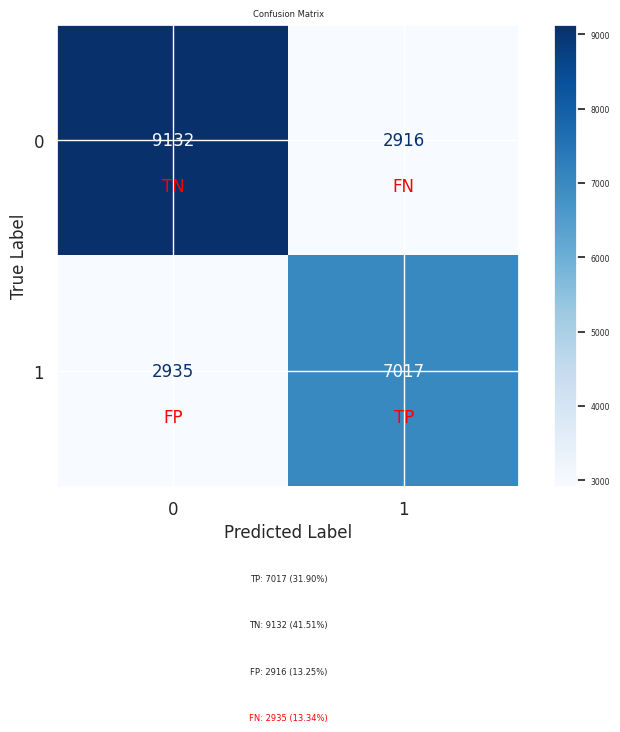

AUC: 0.7315
RMSE: 0.5157
MSE: 0.2660
MAE: 0.2660


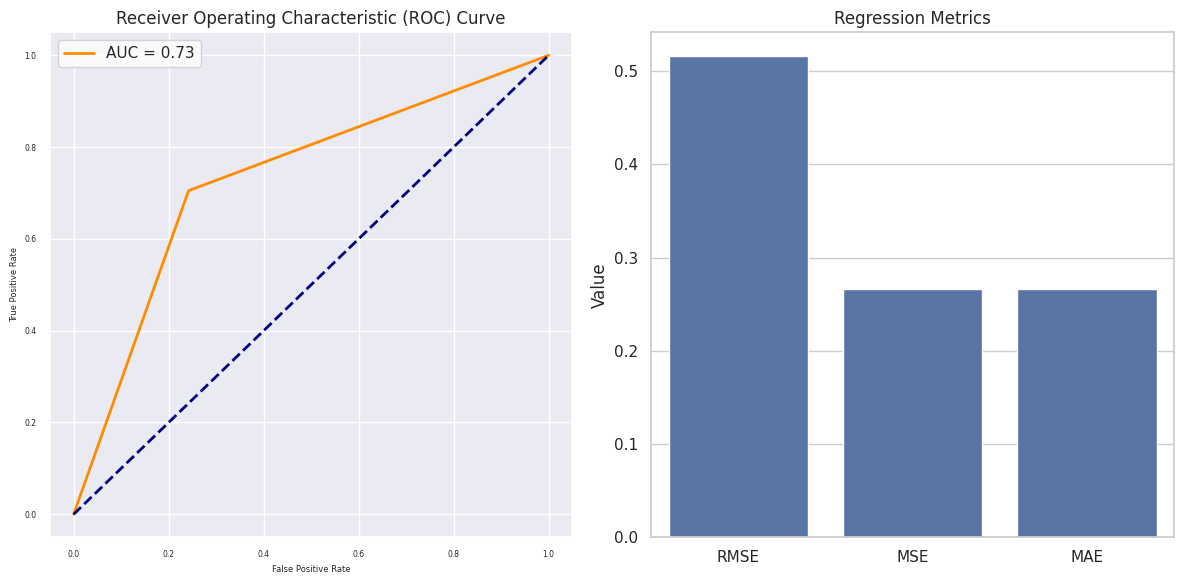

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 'df4' is the DataFrame and 'Response' is the response variable
X = df4.drop('Response', axis=1)  # Features (independent variables)
y = df4['Response']  # Response variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with 'sag' solver
logreg_model = LogisticRegression(max_iter=1000, solver='saga',class_weight='balanced')

# Fit the logistic regression model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy1:.4f}")
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
# Calculate percentages
total_samples = len(y_pred)
percent_TP1 = (TP / total_samples) * 100
percent_TN1 = (TN / total_samples) * 100
percent_FP1 = (FP / total_samples) * 100
percent_FN1 = (FN / total_samples) * 100




# Display the confusion matrix with corresponding labels inside the grid
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=logreg_model.classes_)
fig, ax = plt.subplots(figsize=(9, 6))
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Customize the font size of displayed values
for text in disp.text_.ravel():
    text.set_fontsize(12)

# Set the font size for labels and tick labels
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)


# Display corresponding formatted labels manually adjusted for "FN" and "TP"
ax.text(1, 0.2, 'FN', ha='center', va='center', color='red',fontsize=12)
ax.text(1, 1.2, 'TP', ha='center', va='center', color='red',fontsize=12)
ax.text(0, 0.2, 'TN', ha='center', va='center', color='red',fontsize=12)
ax.text(0, 1.2, 'FP', ha='center', va='center', color='red',fontsize=12)

# Display additional metrics
plt.text(0.5, -0.2, f'TP: {TP} ({percent_TP1:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'TN: {TN} ({percent_TN1:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'FP: {FP} ({percent_FP1:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'FN: {FN} ({percent_FN1:.2f}%)', horizontalalignment='center', color='red', verticalalignment='center', transform=plt.gca().transAxes)


plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print(f"AUC: {roc_auc:.4f}")

# Calculate regression metrics
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)

# Print regression metrics
print(f"RMSE: {rmse1:.4f}")
print(f"MSE: {mse1:.4f}")
print(f"MAE: {mae1:.4f}")

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=['RMSE', 'MSE', 'MAE'], y=[rmse1, mse1, mae1])
plt.title('Regression Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


Now we will use the same model, but now use data without outliers (df5)

Accuracy on the test set: 0.7537
Confusion Matrix:
[[6912 1890]
 [2177 5536]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      8802
           1       0.75      0.72      0.73      7713

    accuracy                           0.75     16515
   macro avg       0.75      0.75      0.75     16515
weighted avg       0.75      0.75      0.75     16515



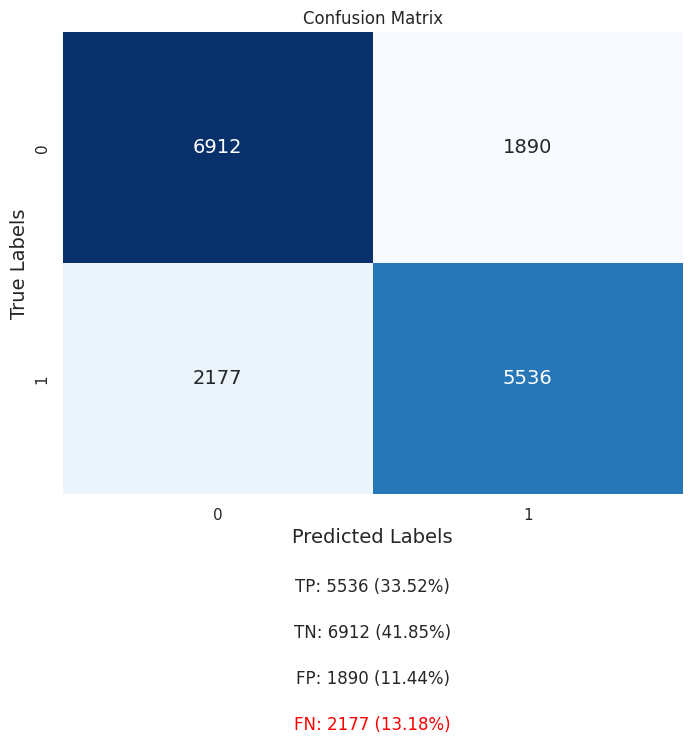

AUC: 0.7515
RMSE: 0.4962
MSE: 0.2463
MAE: 0.2463


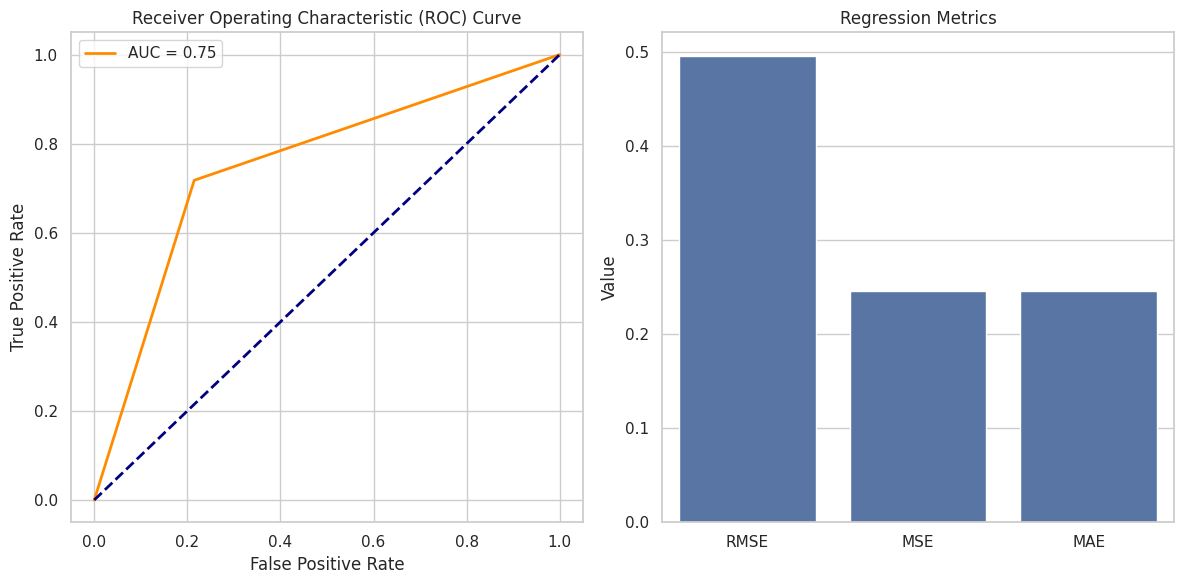

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 'df5' is the DataFrame and 'Response' is the response variable
X = df5.drop('Response', axis=1)  # Features (independent variables)
y = df5['Response']  # Response variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with 'sag' solver and balanced class weights
logreg_model = LogisticRegression(max_iter=1000, solver='saga', class_weight='balanced')

# Fit the logistic regression model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy2:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
# Calculate percentages
total_samples = len(y_pred)
percent_TP2 = (TP / total_samples) * 100
percent_TN2 = (TN / total_samples) * 100
percent_FP2 = (FP / total_samples) * 100
percent_FN2 = (FN / total_samples) * 100




# Print the confusion matrix as a plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Customize the font size of displayed values
for text in disp.text_.ravel():
    text.set_fontsize(12)

# Set the font size for labels and tick labels
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)


# Display corresponding formatted labels manually adjusted for "FN" and "TP"
ax.text(1, 0.2, 'FN', ha='center', va='center', color='red',fontsize=12)
ax.text(1, 1.2, 'TP', ha='center', va='center', color='red',fontsize=12)
ax.text(0, 0.2, 'TN', ha='center', va='center', color='red',fontsize=12)
ax.text(0, 1.2, 'FP', ha='center', va='center', color='red',fontsize=12)

# Display additional metrics
plt.text(0.5, -0.2, f'TP: {TP} ({percent_TP2:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'TN: {TN} ({percent_TN2:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'FP: {FP} ({percent_FP2:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'FN: {FN} ({percent_FN2:.2f}%)', horizontalalignment='center', color='red', verticalalignment='center', transform=plt.gca().transAxes)


plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print(f"AUC: {roc_auc:.4f}")

# Calculate regression metrics
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
mse2 = mean_squared_error(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)

# Print regression metrics
print(f"RMSE: {rmse2:.4f}")
print(f"MSE: {mse2:.4f}")
print(f"MAE: {mae2:.4f}")

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=['RMSE', 'MSE', 'MAE'], y=[rmse2, mse2, mae2])
plt.title('Regression Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

We can see that the model performance slightly improved, achieving an accuracy of 75.39%. That means that removing outliers, indeed made the train model better, but we have to be careful as to not overfit the data.

Now, we will use the same model and resampling method for df5_no_multicollinear_vars. To see how removing multicollinear variables affected the model performance

Accuracy on the test set: 0.6789
Confusion Matrix:
[[5943 2859]
 [2444 5269]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      8802
           1       0.65      0.68      0.67      7713

    accuracy                           0.68     16515
   macro avg       0.68      0.68      0.68     16515
weighted avg       0.68      0.68      0.68     16515



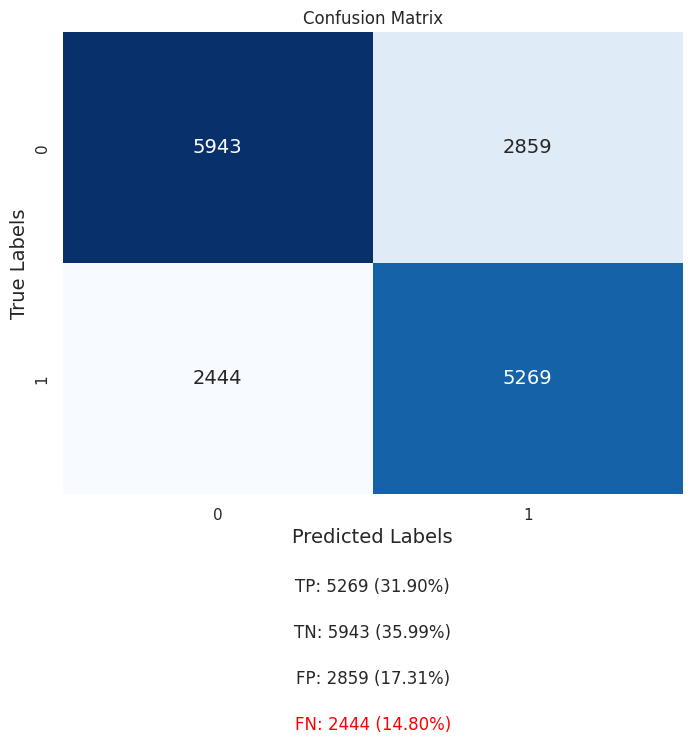

AUC: 0.6792
RMSE: 0.5667
MSE: 0.3211
MAE: 0.3211


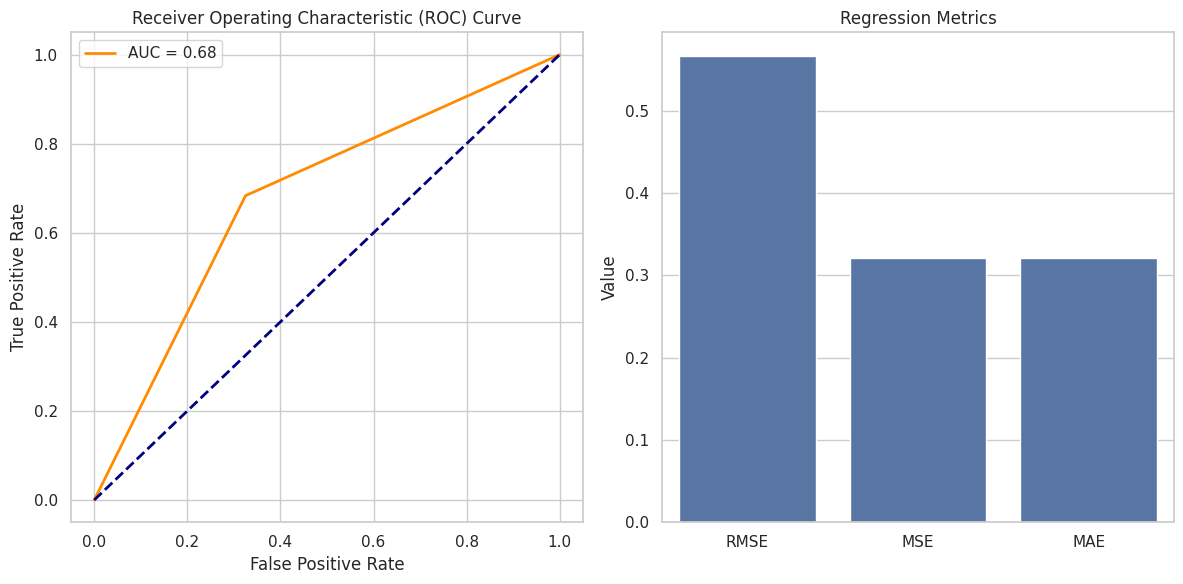

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# df5_no_multicollinear_vars is the DataFrame and 'Response' is the response variable
X = df5_no_multicollinear_vars.drop('Response', axis=1)  # Features (independent variables)
y = df5_no_multicollinear_vars['Response']  # Response variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with 'sag' solver and balanced class weights
logreg_model = LogisticRegression(max_iter=1000, solver='saga', class_weight='balanced')

# Fit the logistic regression model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy3:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
# Calculate percentages
total_samples = len(y_pred)
percent_TP3 = (TP / total_samples) * 100
percent_TN3 = (TN / total_samples) * 100
percent_FP3 = (FP / total_samples) * 100
percent_FN3 = (FN / total_samples) * 100




# Print the confusion matrix as a plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Customize the font size of displayed values
for text in disp.text_.ravel():
    text.set_fontsize(12)

# Set the font size for labels and tick labels
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)


# Display corresponding formatted labels manually adjusted for "FN" and "TP"
ax.text(1, 0.2, 'FN', ha='center', va='center', color='red',fontsize=12)
ax.text(1, 1.2, 'TP', ha='center', va='center', color='red',fontsize=12)
ax.text(0, 0.2, 'TN', ha='center', va='center', color='red',fontsize=12)
ax.text(0, 1.2, 'FP', ha='center', va='center', color='red',fontsize=12)

# Display additional metrics
plt.text(0.5, -0.2, f'TP: {TP} ({percent_TP3:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'TN: {TN} ({percent_TN3:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'FP: {FP} ({percent_FP3:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'FN: {FN} ({percent_FN3:.2f}%)', horizontalalignment='center', color='red', verticalalignment='center', transform=plt.gca().transAxes)


plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print(f"AUC: {roc_auc:.4f}")

# Calculate regression metrics
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
mse3= mean_squared_error(y_test, y_pred)
mae3= mean_absolute_error(y_test, y_pred)

# Print regression metrics
print(f"RMSE: {rmse3:.4f}")
print(f"MSE: {mse3:.4f}")
print(f"MAE: {mae3:.4f}")

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=['RMSE', 'MSE', 'MAE'], y=[rmse3, mse3, mae3])
plt.title('Regression Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

Interestingly, removing multicollinearity from the dataset decreased accuracy in the performance. My assumption is that those multicollinear variables are actually important predictors and removing them hurts the model performance.

For the next model we will use the same data sets, but now use a different resampling method. We will use a Cross-Validation method: more specifically Stratified K-fold Cross-validation. Stratified k-fold cross-validation is an extension of the k-fold cross-validation technique, primarily designed for classification tasks. In k-fold cross-validation, the dataset is divided into k equally sized folds, and the model is trained and evaluated k times, each time using a different fold as the test set and the remaining folds as the training set. Stratified k-fold cross-validation ensures that the class distribution within each fold closely resembles the overall class distribution, addressing potential issues with class imbalance and providing a more robust evaluation of model performance.

First, for df4:

Confusion Matrix:
[[45707 14417]
 [14644 35231]]
Overall Accuracy: 0.7358


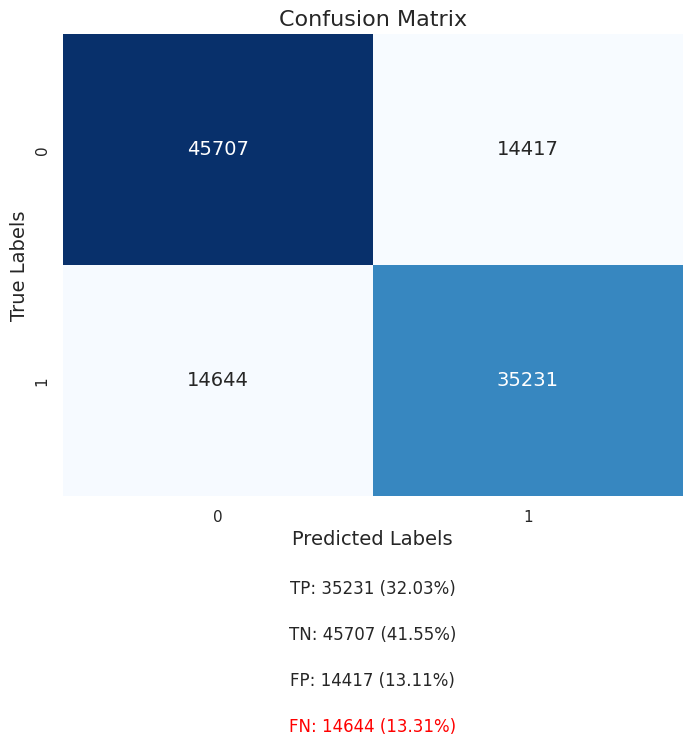

AUC: 0.7333
RMSE: 0.5140
MSE: 0.2642
MAE: 0.2642


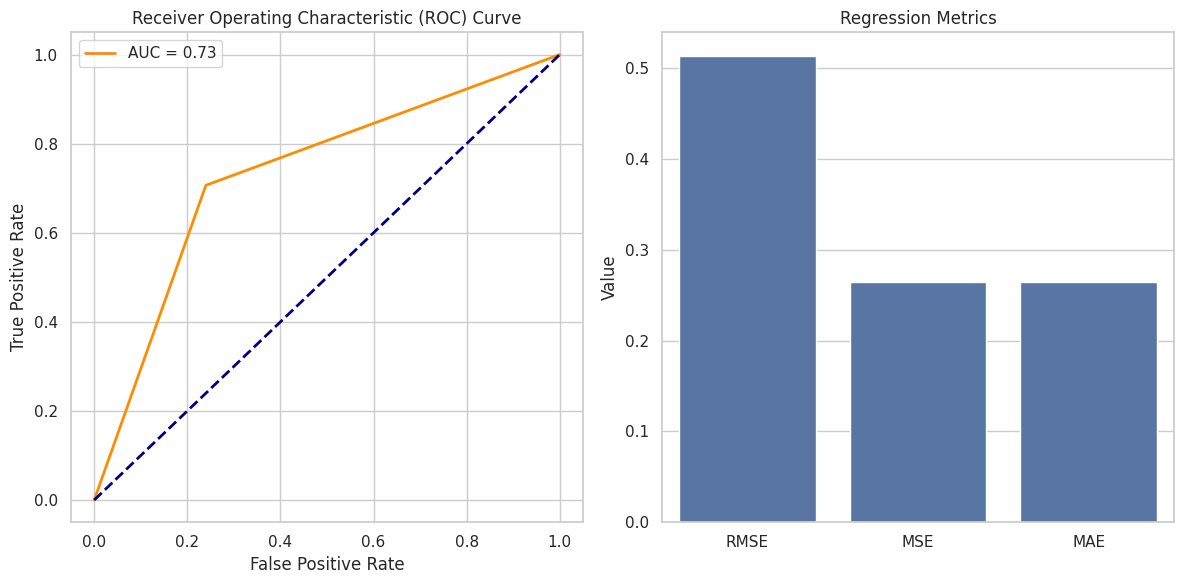

In [53]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
import numpy as np

# 'df4' is the DataFrame and 'Response' is the response variable
X = df4.drop('Response', axis=1)  # Features (independent variables)
y = df4['Response']  # Response variable

# Use StratifiedKFold for balanced class distribution in each fold
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Create a pipeline with StandardScaler and Logistic Regression
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))

# Perform k-fold cross-validation and obtain predicted labels
y_pred = cross_val_predict(model, X, y, cv=stratified_kfold)

# Print the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate additional metrics
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
# Calculate percentages
total_samples = len(y)
percent_TP4 = (TP / total_samples) * 100
percent_TN4 = (TN / total_samples) * 100
percent_FP4 = (FP / total_samples) * 100
percent_FN4 = (FN / total_samples) * 100



# Calculate and print overall accuracy
accuracy4 = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy4:.4f}")
import seaborn as sns
import matplotlib.pyplot as plt



# Print the confusion matrix as a plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Display additional metrics
plt.text(0.5, -0.2, f'TP: {TP} ({percent_TP4:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'TN: {TN} ({percent_TN4:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'FP: {FP} ({percent_FP4:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'FN: {FN} ({percent_FN4:.2f}%)', horizontalalignment='center', color='red', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

# Print AUC score
print(f"AUC: {roc_auc:.4f}")

# Calculate regression metrics
rmse4 = np.sqrt(mean_squared_error(y, y_pred))
mse4 = mean_squared_error(y, y_pred)
mae4 = mean_absolute_error(y, y_pred)

# Print regression metrics
print(f"RMSE: {rmse4:.4f}")
print(f"MSE: {mse4:.4f}")
print(f"MAE: {mae4:.4f}")

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=['RMSE', 'MSE', 'MAE'], y=[rmse4, mse4, mae4])
plt.title('Regression Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


It performed almost the same as train-split test.

Now we will use the same resampling method and the same model for df5.

Confusion Matrix:
[[34462  9526]
 [10805 27778]]
Overall Accuracy: 0.7538


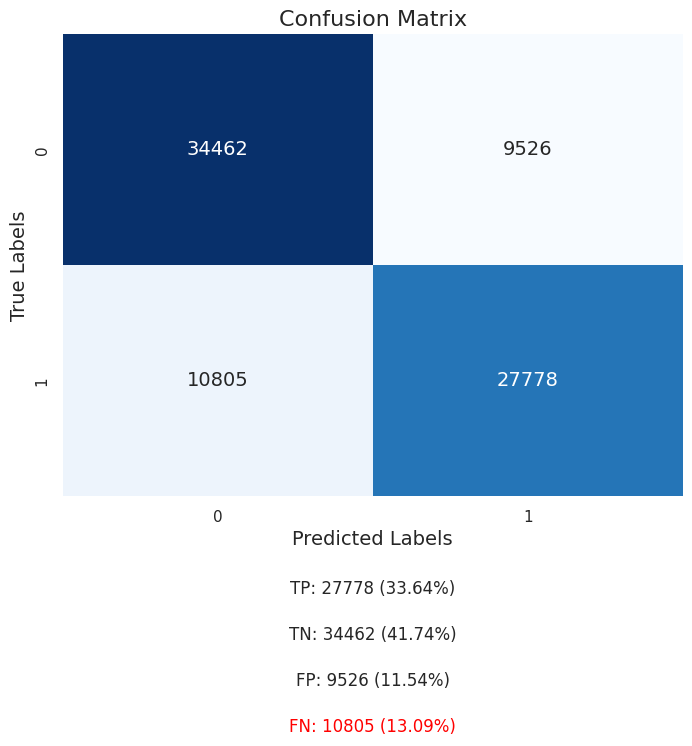

AUC: 0.7517
RMSE: 0.4962
MSE: 0.2462
MAE: 0.2462


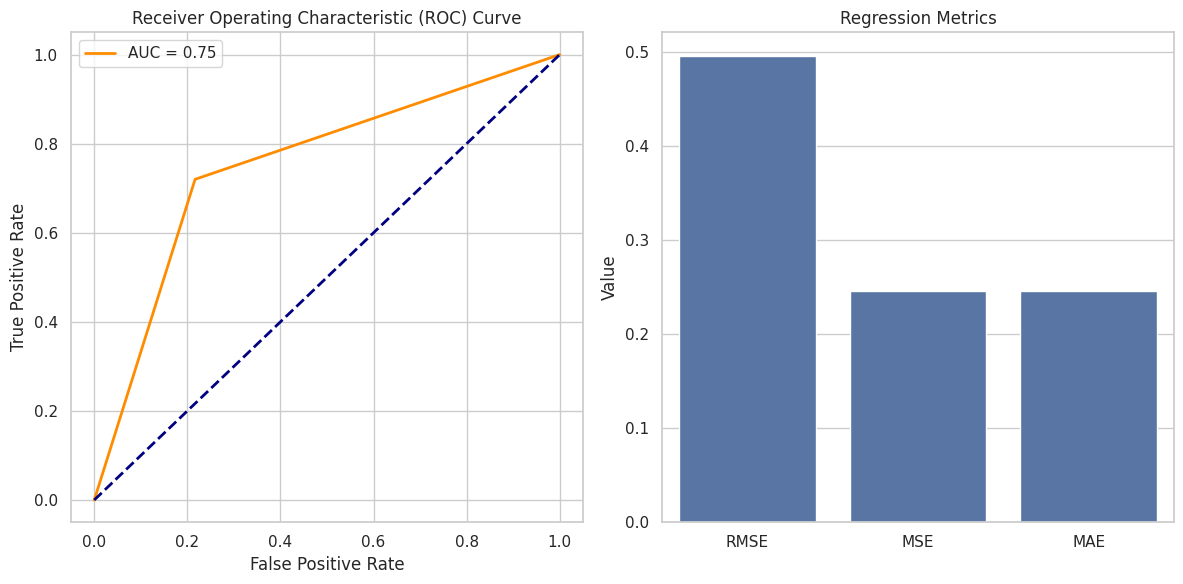

In [54]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
import numpy as np

# 'df5' is the DataFrame and 'Response' is the response variable
X = df5.drop('Response', axis=1)  # Features (independent variables)
y = df5['Response']  # Response variable

# Use StratifiedKFold for balanced class distribution in each fold
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Create a pipeline with StandardScaler and Logistic Regression
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))

# Perform k-fold cross-validation and obtain predicted labels
y_pred = cross_val_predict(model, X, y, cv=stratified_kfold)

# Print the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate additional metrics
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
# Calculate percentages
total_samples = len(y)
percent_TP5 = (TP / total_samples) * 100
percent_TN5 = (TN / total_samples) * 100
percent_FP5 = (FP / total_samples) * 100
percent_FN5 = (FN / total_samples) * 100



# Calculate and print overall accuracy
accuracy5 = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy5:.4f}")
import seaborn as sns
import matplotlib.pyplot as plt



# Print the confusion matrix as a plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Display additional metrics
plt.text(0.5, -0.2, f'TP: {TP} ({percent_TP5:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'TN: {TN} ({percent_TN5:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'FP: {FP} ({percent_FP5:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'FN: {FN} ({percent_FN5:.2f}%)', horizontalalignment='center', color='red', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

# Print AUC score
print(f"AUC: {roc_auc:.4f}")

# Calculate regression metrics
rmse5 = np.sqrt(mean_squared_error(y, y_pred))
mse5 = mean_squared_error(y, y_pred)
mae5 = mean_absolute_error(y, y_pred)

# Print regression metrics
print(f"RMSE: {rmse5:.4f}")
print(f"MSE: {mse5:.4f}")
print(f"MAE: {mae5:.4f}")

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=['RMSE', 'MSE', 'MAE'], y=[rmse5, mse5, mae5])
plt.title('Regression Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


As with df4, it performed almost the same as the train-split test.

Confusion Matrix:
[[29975 14013]
 [12348 26235]]
Overall Accuracy: 0.6807


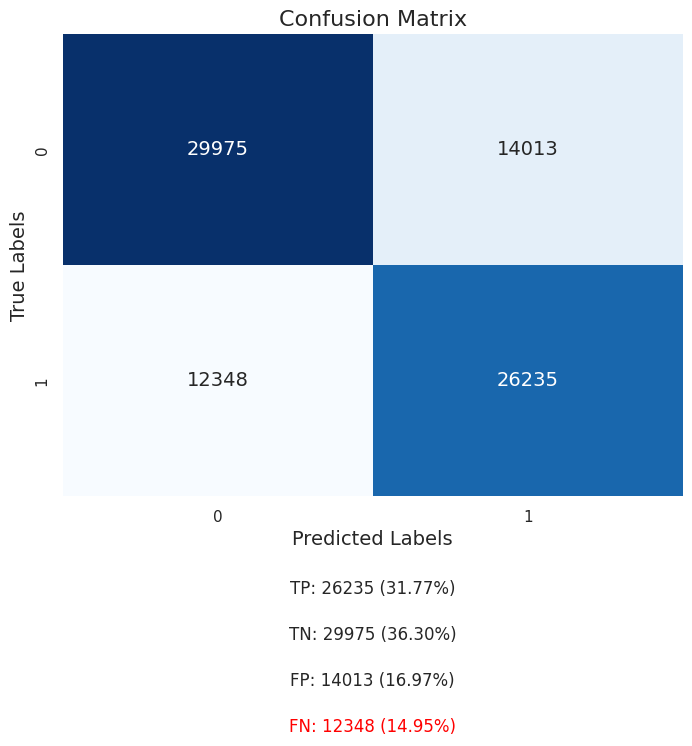

AUC: 0.6807
RMSE: 0.5650
MSE: 0.3193
MAE: 0.3193


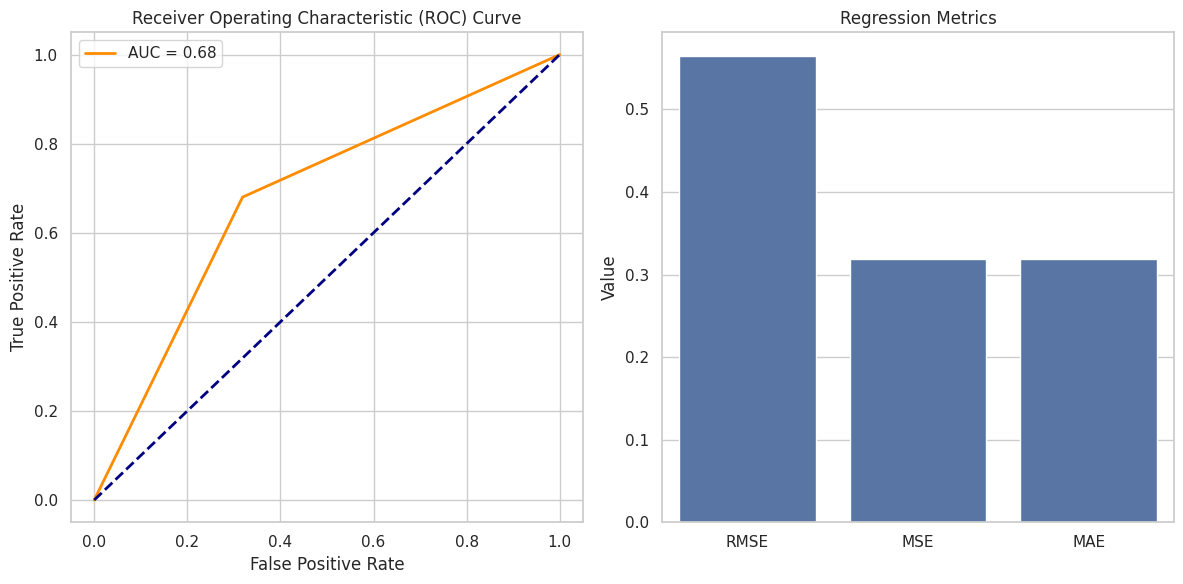

In [55]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
import numpy as np

# 'df5_no_multicollinear_vars' is your DataFrame and 'Response' is the response variable
X = df5_no_multicollinear_vars.drop('Response', axis=1)  # Features (independent variables)
y = df5_no_multicollinear_vars['Response']  # Response variable

# Use StratifiedKFold for balanced class distribution in each fold
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Create a pipeline with StandardScaler and Logistic Regression
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))

# Perform k-fold cross-validation and obtain predicted labels
y_pred = cross_val_predict(model, X, y, cv=stratified_kfold)

# Print the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate additional metrics
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
# Calculate percentages
total_samples = len(y)
percent_TP6 = (TP / total_samples) * 100
percent_TN6 = (TN / total_samples) * 100
percent_FP6 = (FP / total_samples) * 100
percent_FN6 = (FN / total_samples) * 100



# Calculate and print overall accuracy
accuracy6 = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy6:.4f}")
import seaborn as sns
import matplotlib.pyplot as plt



# Print the confusion matrix as a plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Display additional metrics
plt.text(0.5, -0.2, f'TP: {TP} ({percent_TP6:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'TN: {TN} ({percent_TN6:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'FP: {FP} ({percent_FP6:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'FN: {FN} ({percent_FN6:.2f}%)', horizontalalignment='center', color='red', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

# Print AUC score
print(f"AUC: {roc_auc:.4f}")

# Calculate regression metrics
rmse6 = np.sqrt(mean_squared_error(y, y_pred))
mse6= mean_squared_error(y, y_pred)
mae6 = mean_absolute_error(y, y_pred)

# Print regression metrics
print(f"RMSE: {rmse6:.4f}")
print(f"MSE: {mse6:.4f}")
print(f"MAE: {mae6:.4f}")

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=['RMSE', 'MSE', 'MAE'], y=[rmse6, mse6, mae6])
plt.title('Regression Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


As with others, this model performed almost the same as train-split test, but we've seen a very slight improvement in this one.

For df5_no_multicollinear_vars accuracy slightly decreased

Right now we havea a very high FN value. Due to this algorithm detecting diseases, we want to minimize False Negatives. Meaning, we want to minimize cases where a diagnostic test incorrectly indicates that an individual does not have a disease when, in fact, they do. That means we want to prioritize sensitivity, meaning the test will have a lower likelihood of producing false negatives.

Confusion Matrix:
[[25203 18785]
 [ 4914 33669]]
Overall Accuracy: 0.7130


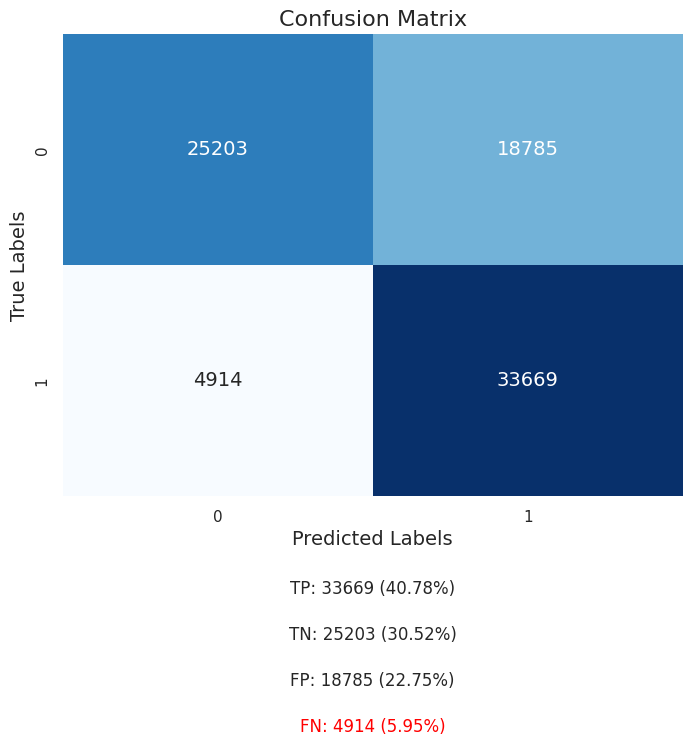

AUC: 0.7228
RMSE: 0.5357
MSE: 0.2870
MAE: 0.2870


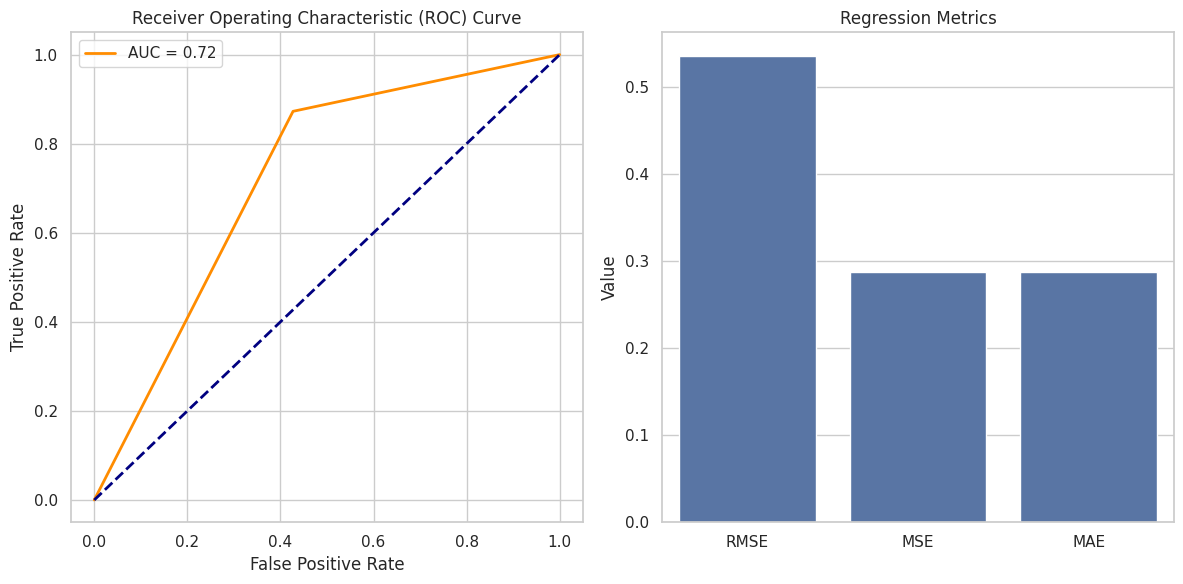

In [56]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# 'df5' is your DataFrame and 'Response' is the response variable
X = df5.drop('Response', axis=1)  # Features (independent variables)
y = df5['Response']  # Response variable

# Calculate class weights to prioritize minimizing false negatives
class_weights = len(y) / (2 * np.bincount(y))

# Increase the weight for the positive class (class 1)
class_weights[1] *= 2

# Use StratifiedKFold for balanced class distribution in each fold
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Create a pipeline with StandardScaler and Logistic Regression with adjusted class weights
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42, max_iter=1000))

# Perform k-fold cross-validation and obtain predicted labels
y_pred = cross_val_predict(model, X, y, cv=stratified_kfold)

# Print the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Calculate additional metrics
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
# Calculate percentages
total_samples = len(y)
percent_TP7 = (TP / total_samples) * 100
percent_TN7 = (TN / total_samples) * 100
percent_FP7 = (FP / total_samples) * 100
percent_FN7 = (FN / total_samples) * 100


# Calculate and print overall accuracy
accuracy7 = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy7:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt




# Print the confusion matrix as a plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
# Display additional metrics
plt.text(0.5, -0.2, f'TP: {TP} ({percent_TP7:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'TN: {TN} ({percent_TN7:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'FP: {FP} ({percent_FP7:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'FN: {FN} ({percent_FN7:.2f}%)', horizontalalignment='center', color='red', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

# Print AUC score
print(f"AUC: {roc_auc:.4f}")

# Calculate regression metrics
rmse7 = np.sqrt(mean_squared_error(y, y_pred))
mse7 = mean_squared_error(y, y_pred)
mae7 = mean_absolute_error(y, y_pred)

# Print regression metrics
print(f"RMSE: {rmse7:.4f}")
print(f"MSE: {mse7:.4f}")
print(f"MAE: {mae7:.4f}")

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=['RMSE', 'MSE', 'MAE'], y=[rmse7, mse7, mae7])
plt.title('Regression Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


Confusion Matrix:
[[30144 29980]
 [ 5606 44269]]
Overall Accuracy: 0.6765


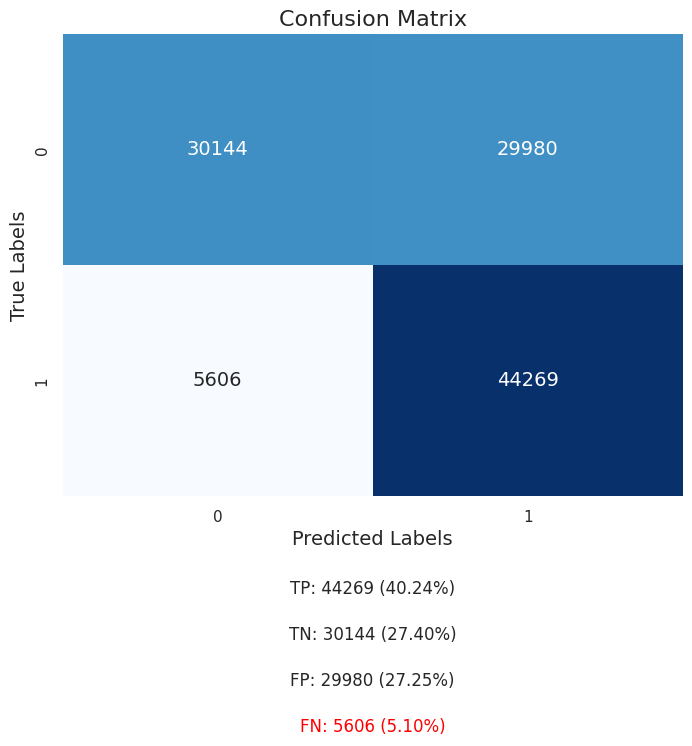

AUC: 0.6945
RMSE: 0.5688
MSE: 0.3235
MAE: 0.3235


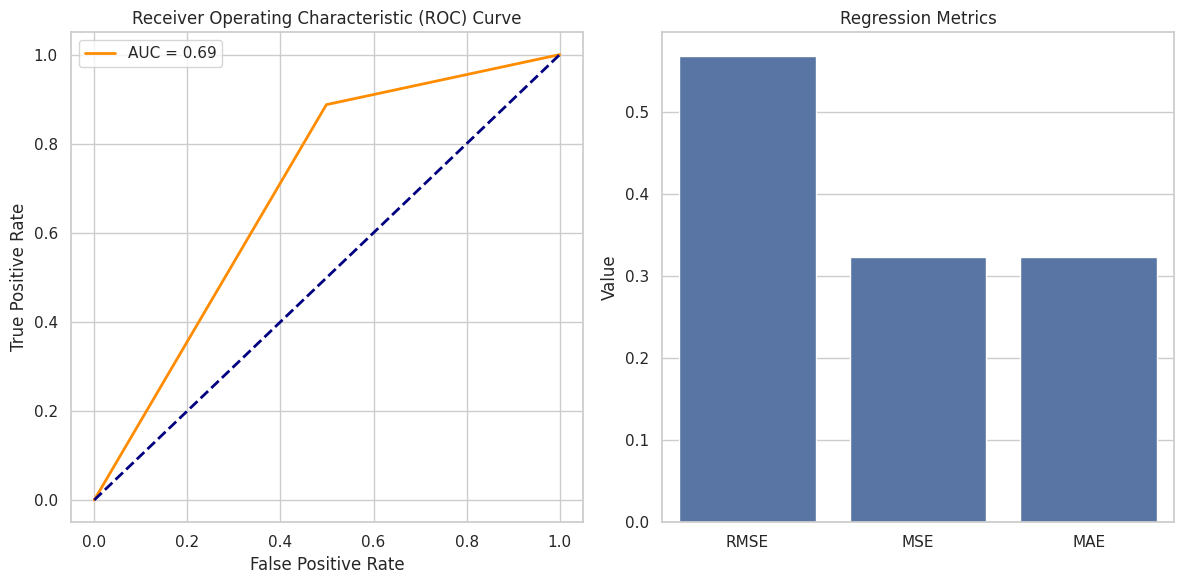

In [57]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# 'df4' is your DataFrame and 'Response' is the response variable
X = df4.drop('Response', axis=1)  # Features (independent variables)
y = df4['Response']  # Response variable

# Calculate class weights to prioritize minimizing false negatives
class_weights = len(y) / (2 * np.bincount(y))

# Increase the weight for the positive class (class 1)
class_weights[1] *= 2

# Use StratifiedKFold for balanced class distribution in each fold
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Create a pipeline with StandardScaler and Logistic Regression with adjusted class weights
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42, max_iter=1000))

# Perform k-fold cross-validation and obtain predicted labels
y_pred = cross_val_predict(model, X, y, cv=stratified_kfold)

# Print the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Calculate additional metrics
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
# Calculate percentages
total_samples = len(y)
percent_TP8 = (TP / total_samples) * 100
percent_TN8 = (TN / total_samples) * 100
percent_FP8 = (FP / total_samples) * 100
percent_FN8 = (FN / total_samples) * 100


# Calculate and print overall accuracy
accuracy8 = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy8:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt




# Print the confusion matrix as a plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
# Display additional metrics
plt.text(0.5, -0.2, f'TP: {TP} ({percent_TP8:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'TN: {TN} ({percent_TN8:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'FP: {FP} ({percent_FP8:.2f}%)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'FN: {FN} ({percent_FN8:.2f}%)', horizontalalignment='center', color='red', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

# Print AUC score
print(f"AUC: {roc_auc:.4f}")

# Calculate regression metrics
rmse8 = np.sqrt(mean_squared_error(y, y_pred))
mse8 = mean_squared_error(y, y_pred)
mae8 = mean_absolute_error(y, y_pred)

# Print regression metrics
print(f"RMSE: {rmse8:.4f}")
print(f"MSE: {mse8:.4f}")
print(f"MAE: {mae8:.4f}")

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=['RMSE', 'MSE', 'MAE'], y=[rmse8, mse8, mae8])
plt.title('Regression Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


Let's summarize our findings using visualization.

<ipython-input-58-f5b08a897d8e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='viridis')
<ipython-input-58-f5b08a897d8e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='viridis')
<ipython-input-58-f5b08a897d8e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette='viridis')


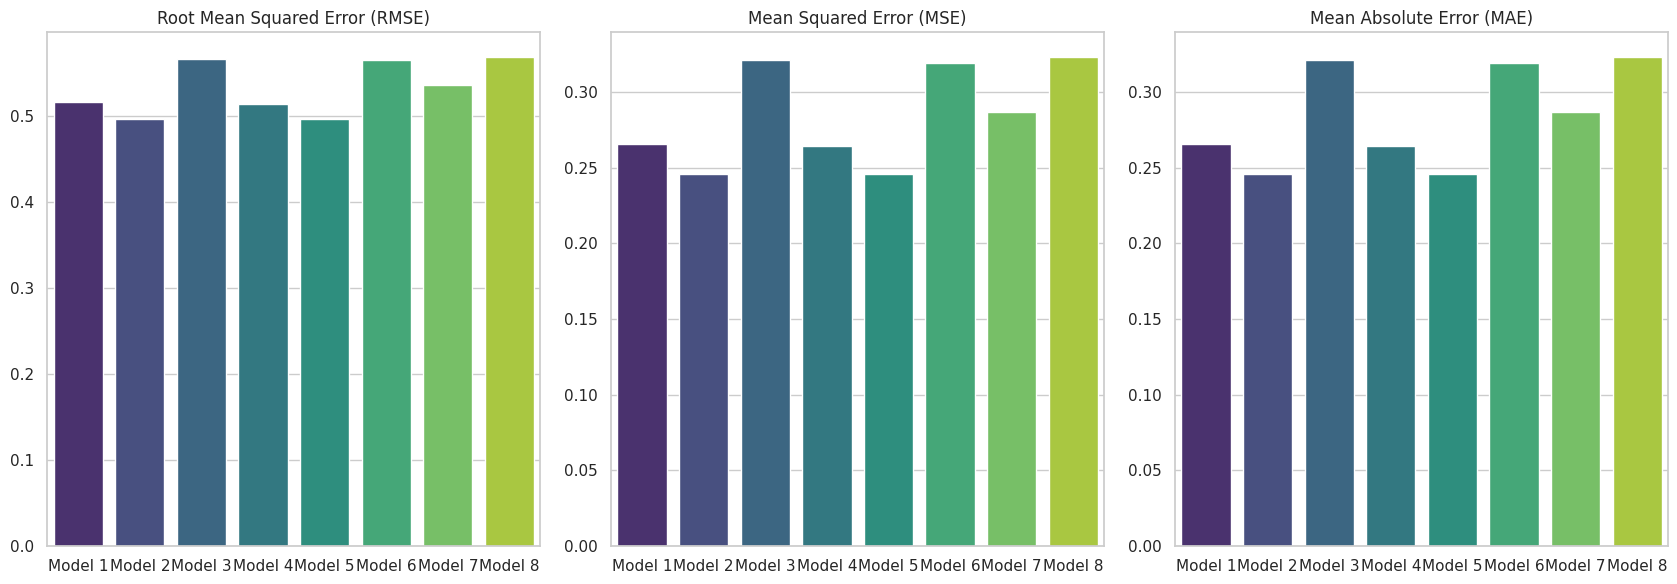

<ipython-input-58-f5b08a897d8e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=percent_TP_values, palette='plasma')
<ipython-input-58-f5b08a897d8e>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=percent_TN_values, palette='plasma')
<ipython-input-58-f5b08a897d8e>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=percent_FP_values, palette='plasma')
<ipython-input-58-f5b08a897d8e>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

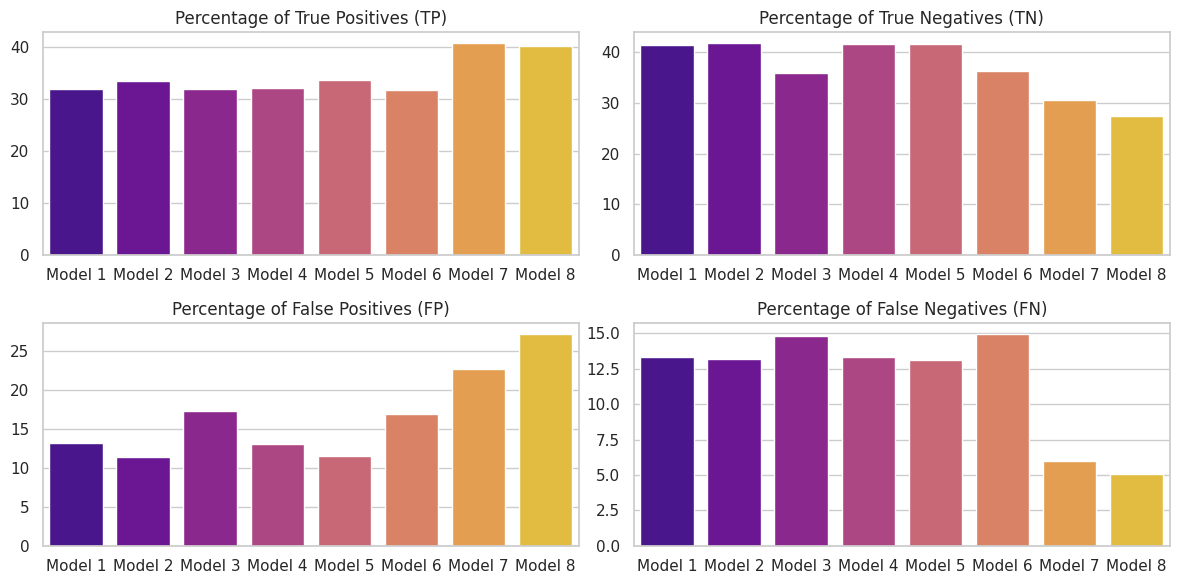

<ipython-input-58-f5b08a897d8e>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_values, palette='deep')


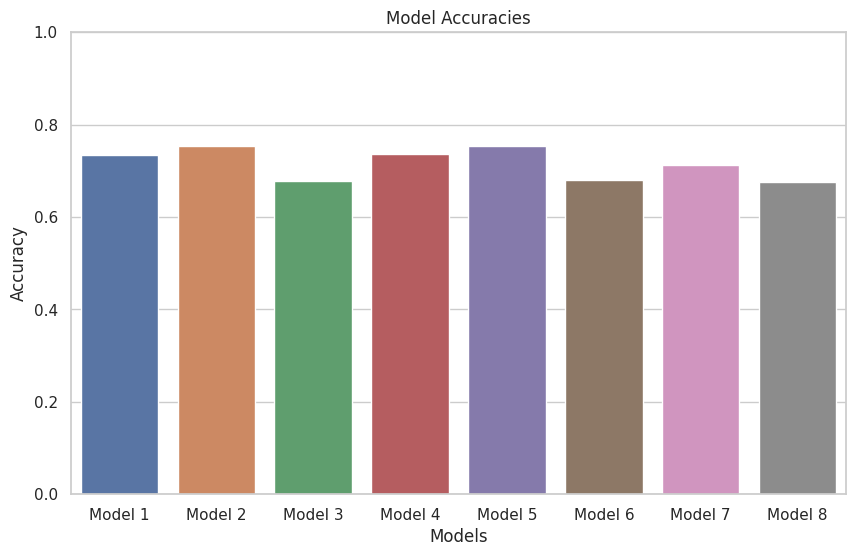

Model 1: Accuracy = 0.734
Model 2: Accuracy = 0.754
Model 3: Accuracy = 0.679
Model 4: Accuracy = 0.736
Model 5: Accuracy = 0.754
Model 6: Accuracy = 0.681
Model 7: Accuracy = 0.713
Model 8: Accuracy = 0.676


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
# metric values for each model
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5', 'Model 6', 'Model 7', 'Model 8']
rmse_values = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8]
mse_values = [mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8]
mae_values = [mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8]

# Create a bar plot for RMSE
plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=rmse_values, palette='viridis')
plt.title('Root Mean Squared Error (RMSE)')

# Create a bar plot for MSE
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title('Mean Squared Error (MSE)')

# Create a bar plot for MAE
plt.subplot(1, 3, 3)
sns.barplot(x=models, y=mae_values, palette='viridis')
plt.title('Mean Absolute Error (MAE)')

plt.tight_layout()
plt.show()



# Bar Plot for Percent of Confusion Matrix values
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5', 'Model 6', 'Model 7', 'Model 8']
percent_TP_values = [percent_TP1, percent_TP2, percent_TP3, percent_TP4, percent_TP5, percent_TP6, percent_TP7, percent_TP8]
percent_TN_values = [percent_TN1, percent_TN2, percent_TN3, percent_TN4, percent_TN5, percent_TN6, percent_TN7, percent_TN8]
percent_FP_values = [percent_FP1, percent_FP2, percent_FP3, percent_FP4, percent_FP5, percent_FP6, percent_FP7, percent_FP8]
percent_FN_values = [percent_FN1, percent_FN2, percent_FN3, percent_FN4, percent_FN5, percent_FN6, percent_FN7, percent_FN8]

# Create a bar plot for percent TP
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=percent_TP_values, palette='plasma')
plt.title('Percentage of True Positives (TP)')

# Create a bar plot for percent TN
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=percent_TN_values, palette='plasma')
plt.title('Percentage of True Negatives (TN)')

# Create a bar plot for percent FP
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=percent_FP_values, palette='plasma')
plt.title('Percentage of False Positives (FP)')

# Create a bar plot for percent FN
plt.subplot(2, 2, 4)
sns.barplot(x=models, y=percent_FN_values, palette='plasma')
plt.title('Percentage of False Negatives (FN)')

plt.tight_layout()
plt.show()

# Assuming you have a list of accuracy values for each model
accuracy_values = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8]
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8']

# Create a bar plot for accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_values, palette='deep')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1 for accuracy values
plt.show()

#  accuracy values for 8 models
accuracy_values = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8]
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8']

# Print out the accuracy values for each model
for model, accuracy in zip(models, accuracy_values):
    print(f"{model}: Accuracy = {accuracy:.3f}")

Model selected: Model 7 - Minimizing False Negatives - I chose this model to minimize FN, while maintaining a good accuracy of the whole model. This model is applied on df5 - which is a dataset selected using backwards selection and also removing outliers.

After selecting this model, let's apply it to the separate test data and save it in a csv file:


In [60]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 'df5' is training DataFrame and 'Response' is the response variable
X_train = df5.drop('Response', axis=1)  # Features (independent variables)
y_train = df5['Response']  # Response variable

# 'test_df' is test DataFrame
X_test = test_df  # Features for test data

# Calculate class weights for training data to prioritize minimizing false negatives
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Increase the weight for the positive class (class 1)
class_weights[1] *= 2

# Use StratifiedKFold for balanced class distribution in each fold
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Create a pipeline with StandardScaler and Logistic Regression with adjusted class weights
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42, max_iter=1000))

# Perform k-fold cross-validation and obtain predicted labels for training data
y_pred_train = cross_val_predict(model, X_train, y_train, cv=stratified_kfold)

# Fit the model on the entire training data for generating predictions on the test data
model.fit(X_train, y_train)

# Predict responses on the test data
y_pred_test = model.predict(X_test)

# Create DataFrames with predicted responses for training and test data
predicted_train_df = pd.DataFrame({'Predicted_Response': y_pred_train})
predicted_test_df = pd.DataFrame({'Predicted_Response': y_pred_test})


# calculating the percentage of value=1 for Response column in df
# percentage of instances that contain the disease

predicted_test_df.to_csv('predicted_responses_test.csv', index=False)


response_ones = predicted_test_df['Predicted_Response'].value_counts()[1]
total_rows = len(predicted_test_df)
percentage = (response_ones / total_rows) * 100
print(f"Percentage of value=1 for Response column: {percentage:.2f}%")


Percentage of value=1 for Response column: 58.69%


This percentage could indicate a high number of false positives, however, our objective is to minimize false negatives, so we have to accept a high percentage of false positives as a trade-off.